___

<a href='http://www.pieriandata.com'> <img src='./Pierian_Data_Logo.png' /></a>
___
# Seaborn Exercises

Time to practice your new seaborn skills! Try to recreate the plots below (don't worry about color schemes, just the plot itself.

## The Data

We will be working with a famous titanic data set for these exercises. Later on in the Machine Learning section of the course, we will revisit this data, and use it to predict survival rates of passengers. For now, we'll just focus on the visualization of the data with seaborn:

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sns.set_style('whitegrid')

In [3]:
titanic = sns.load_dataset('titanic')

In [4]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [96]:
titanic[titanic['sex'] == 'male']['survived'].sum()

109

In [13]:
titanic['fare'].isna().unique()

array([False])

In [12]:
titanic['age'].isna().value_counts()

age
False    714
True     177
Name: count, dtype: int64

In [16]:
print(titanic[['fare', 'age']].isna().sum())

fare      0
age     177
dtype: int64


# Exercises

**Recreate the plots below using the titanic dataframe. There are very few hints since most of the plots can be done with just one or two lines of code and a hint would basically give away the solution. Keep careful attention to the x and y labels for hints.**

**Note! In order to not lose the plot image, make sure you don't code in the cell that is directly above the plot, there is an extra cell above that one which won't overwrite that plot!**

Regression equation: age = nan * fare + nan
The correlation coefficient: nan
p_value: nan


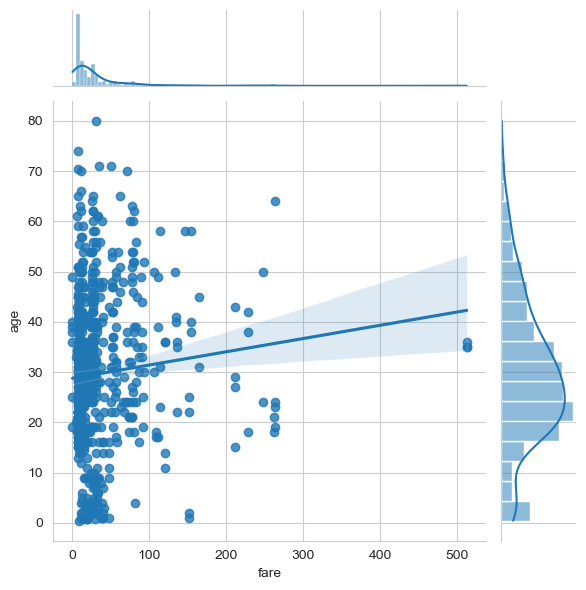

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd

# Load the dataset
titanic = sns.load_dataset('titanic')

# Calculate regression parameters
slope, intercept, r_value, p_value, std_err = linregress(titanic['fare'], titanic['age'].drop())

# Print regression equation
print(f"Regression equation: age = {slope:.2f} * fare + {intercept:.2f}")
print(f"The correlation coefficient: {r_value:.2f}")
print(f"p_value: {p_value:.4f}")
# Plot using seaborn
sns.jointplot(x='fare', y='age', data=titanic, kind='reg')
plt.show()

Regression equation: age = 0.026 * fare + 28.784
The correlation coefficient: 0.0961
p_value: 0.0102


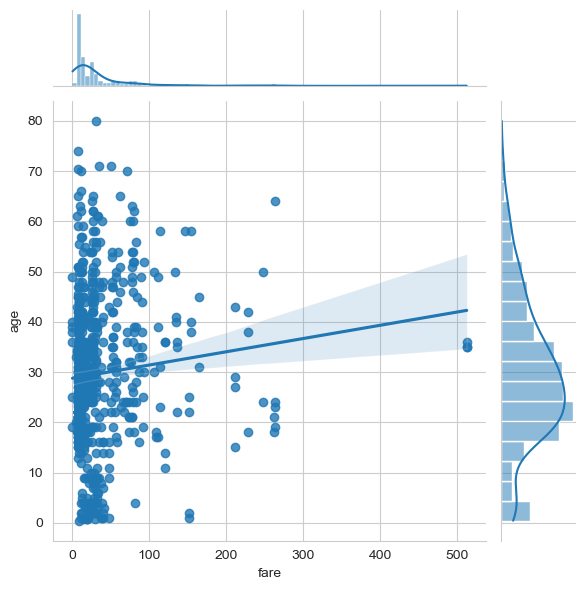

In [20]:
'''
We're getting nan (Not a Number) for the regression results because the columns ('fare' column) you're passing to linregress() — titanic['fare'] and titanic['age'] — contain missing values (NaNs).
🔍 Why This Happens
The function scipy.stats.linregress() does not automatically handle NaNs, so if either column contains NaNs, it will return all nan results:
    linregress([1, 2, np.nan], [4, 5, 6])  → all outputs = nan
'''
#✅ The Fix: Drop Rows with Missing Values. You need to drop rows where either fare or age is missing:
import numpy as np
from scipy.stats import linregress

# Drop rows with NaNs in 'fare' or 'age'
df = titanic[['fare', 'age']].dropna()

# Perform regression
slope, intercept, r_value, p_value, std_err = linregress(df['fare'], df['age'])

# Print results
print(f"Regression equation: age = {slope:.3f} * fare + {intercept:.3f}")
print(f"The correlation coefficient: {r_value:.4f}")
print(f"p_value: {p_value:.4f}")

# ✅ Plot (optional fix for missing data too):
sns.jointplot(x='fare', y='age', data=df, kind='reg')
plt.show()


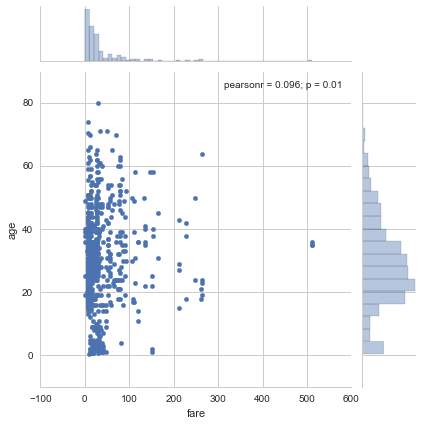

In [22]:
titanic['fare'].max()

512.3292

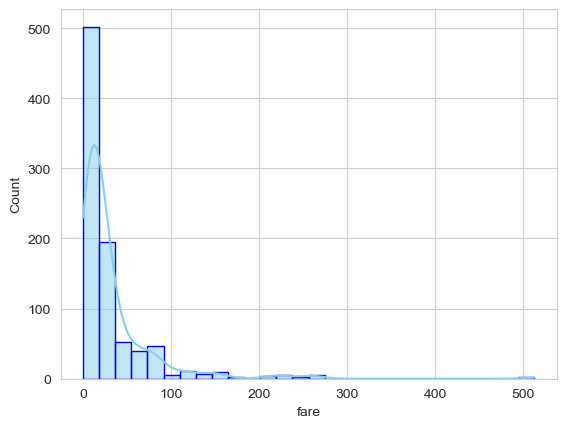

In [34]:
sns.histplot(data=titanic, x='fare', kde=True,bins=28, color='skyblue', edgecolor='blue');

C:\Users\Surface Laptop\AppData\Local\Temp\ipykernel_6820\3554354013.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['fare'],bins=28, kde=False, color='red')


<Axes: xlabel='fare'>

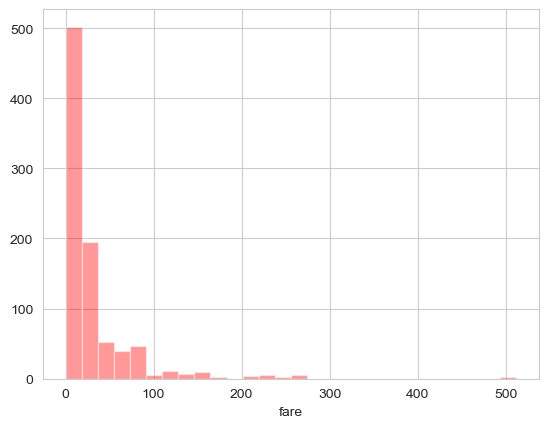

In [51]:
sns.distplot(titanic['fare'],bins=28, kde=False, color='red')

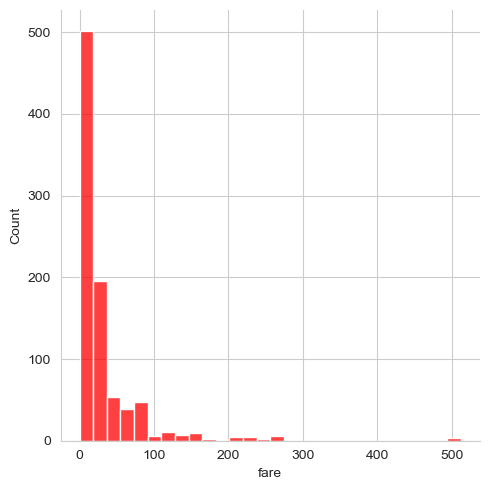

In [53]:
sns.displot(titanic['fare'],bins=28, kde=False, color='red');

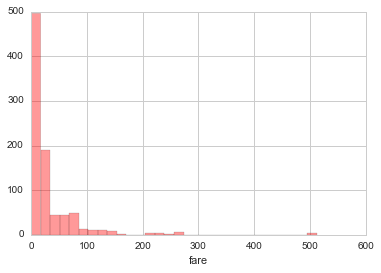

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
tips = sns.load_dataset("tips")

# Create the boxplot without showing the mean
sns.boxplot(x="day", y="total_bill", data=tips, hue='day', showmeans=False)
'''
x='day': Group the data by day (Thur, Fri, Sat, Sun).
y='total_bill': Plot total bill amounts.
hue='day': Each box gets its own color based on the day — although here it's redundant because hue is the same as x. Usually hue is used for a second category like sex.
showmeans=False: Don't show the mean in the default boxplot.
'''

# Compute the means per 'day'
group_means = tips.groupby("day", observed=True)["total_bill"].mean() #Calculates the mean total_bill for each day. observed=True: Only considers days that actually appear in the dataset.


## Overlay Dashed Mean Lines:
# Get the unique categories in the same order as on the x-axis
# categories = tips["day"].unique()

# Draw horizontal dashed mean lines over each box
for i, cat in enumerate(group_means.index): #print(list(enumerate(group_means.index)))      [(0, 'Thur'), (1, 'Fri'), (2, 'Sat'), (3, 'Sun')]
    mean = group_means[cat]
    plt.hlines(y=mean, xmin=i - 0.4, xmax=i + 0.4, colors="black", linestyles="--", linewidth=1)
    plt.text(i, mean + 0.5, f"mean = {mean:.2f}", ha="center", fontsize=8)
'''
group_means.index: ['Thur', 'Fri', 'Sat', 'Sun'].
enumerate(group_means.index): [(0, 'Thur'), (1, 'Fri'), (2, 'Sat'), (3, 'Sun')]
For each i (position on the x-axis), it:
    -Draws a horizontal dashed line using plt.hlines(...) at the mean value.
    -Places a text label slightly above the line to display the mean.
Why xmin=i - 0.4 and xmax=i + 0.4? This ensures the line spans the width of the box plot for that day (approximate width of the box is 0.8 units).

Places a text label showing the mean value above the line.
i: x-position (centered above the box).
mean + 0.5: y-position (slightly above the dashed line).
f"mean = {mean:.2f}": formats the mean to 2 decimal places (e.g., 20.44).
ha="center": horizontally center the text above the category.
fontsize=8: makes the text smaller.
'''
plt.title("Boxplot with Dashed Mean Lines")
plt.show()
# print(group_means.shape)  #(4,)
# print(type(group_means))      #<class 'pandas.core.series.Series'>
print(group_means)
print(sorted(group_means.index))
# print(categories) #Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']
print(group_means.index)    #['Thur', 'Fri', 'Sat', 'Sun']
print(sorted(group_means.index))    #['Fri', 'Sat', 'Sun', 'Thur']
print(list(enumerate(group_means.index)));  #[(0, 'Thur'), (1, 'Fri'), (2, 'Sat'), (3, 'Sun')]

In [55]:
titanic['class'].unique()

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

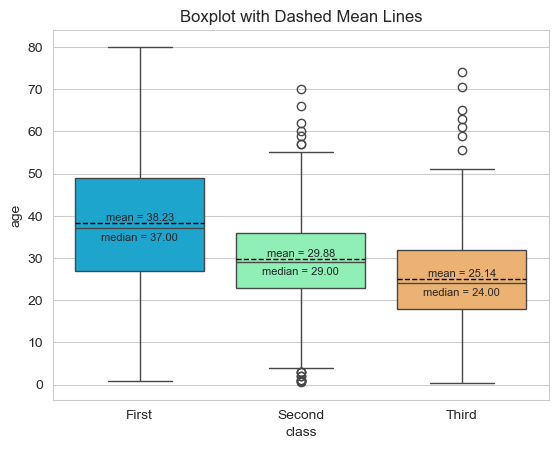

class
First     38.233441
Second    29.877630
Third     25.140620
Name: age, dtype: float64
class
First     37.0
Second    29.0
Third     24.0
Name: age, dtype: float64
[(0, 'First'), (1, 'Second'), (2, 'Third')]


In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
titanic = sns.load_dataset("titanic")

# Create the boxplot without showing the mean
sns.boxplot(x="class", y="age", data=titanic, hue='class', showmeans=False, palette='rainbow')
'''
x='class': Groups the data by passenger class ['Third', 'First', 'Second'].
y='age': Plots the age of passengers in each class.
hue='class': Colors each box by class.
showmeans=False: Disables the mean marker in the boxplot.
'''
# Compute the means per 'class'
group_means = titanic.groupby("class", observed=True)["age"].mean() #Calculates the mean age for each class. observed=True: Only considers classes that actually appear in the dataset.
group_medians = titanic.groupby("class", observed=True)["age"].median()

## Overlay Dashed Mean Lines:
# Draw horizontal dashed mean lines over each box
for i, passclass in enumerate(group_means.index): #print(list(enumerate(group_means.index)))      [(0, 'First'), (1, 'Second'), (2, 'Third')]
    mean = group_means[passclass]
    median = group_medians[passclass]
    plt.hlines(y=mean, xmin=i - 0.4, xmax=i + 0.4, colors="black", linestyles="--", linewidth=1)
    plt.text(i, mean + 0.5, f"mean = {mean:.2f}", ha="center", fontsize=8)
    plt.text(i, median - 3, f"median = {median:.2f}", ha="center", fontsize=8)
'''
group_means.index: ['First', 'Second', 'Third'].
enumerate(group_means.index): [(0, 'First'), (1, 'Second'), (2, 'Third')]
For each i (position on the x-axis), it:
    -Draws a horizontal dashed line using plt.hlines(...) at the mean value.
    -Places a text label slightly above the line to display the mean.
    -Places a text label slightly below the line to display the median.
Why xmin=i - 0.4 and xmax=i + 0.4? This ensures the line spans the width of the box plot for that day (approximate width of the box is 0.8 units).

Places a text label showing the mean value above the line.
i: x-position (centered above the box).
mean + 0.5: y-position (slightly above the dashed line).
f"mean = {mean:.2f}": formats the mean to 2 decimal places (e.g., 20.44).
ha="center": horizontally center the text above the category.
fontsize=8: makes the text smaller.
'''
plt.title("Boxplot with Dashed Mean Lines")
plt.show()
# print(group_means.shape)  #(3,)
# print(type(group_means))      #<class 'pandas.core.series.Series'>
print(group_means)
print(group_medians)
# print(sorted(group_means.index))    #['First', 'Second', 'Third']
# print(group_means.index)    #CategoricalIndex(['First', 'Second', 'Third'], categories=['First', 'Second', 'Third'], ordered=False, dtype='category', name='class')
print(list(enumerate(group_means.index)));  # [(0, 'First'), (1, 'Second'), (2, 'Third')]

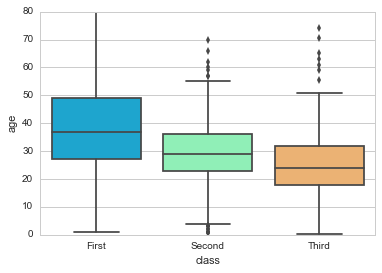

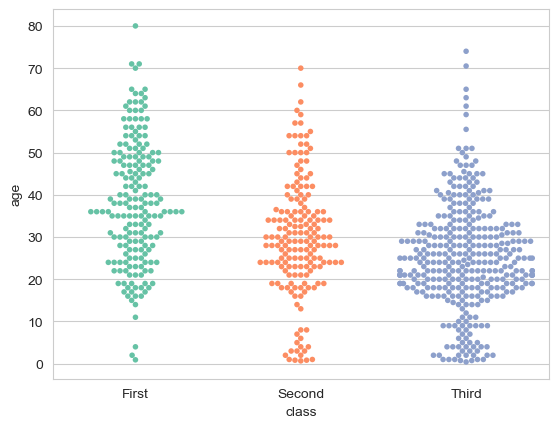

In [82]:
sns.swarmplot(x="class", y="age", data=titanic, hue= 'class', size=4, palette='Set2'); 
# A swarmplot is very similar to a stripplot, except that the points are adjusted so they don't overlap. This provides a better representation of the distribution of values. It's somewhat like combining a stripplot with a violinplot.

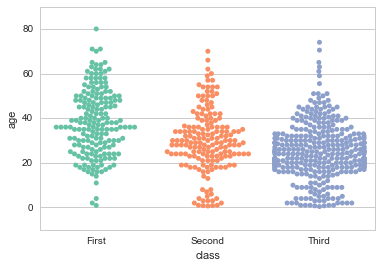

In [86]:
titanic['sex'].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

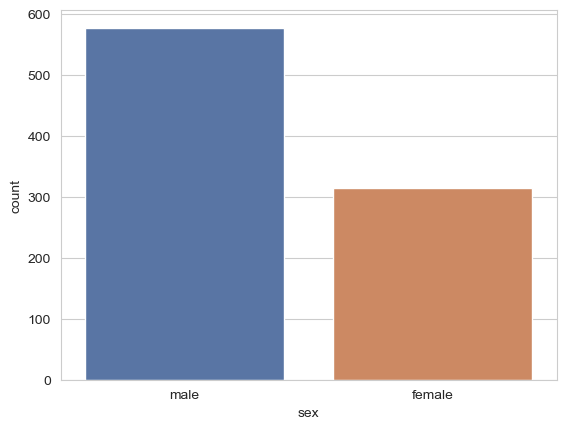

In [85]:
sns.countplot(data=titanic, x='sex', hue='sex',palette='deep')

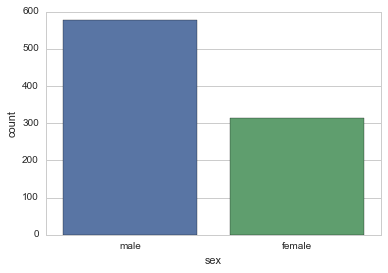

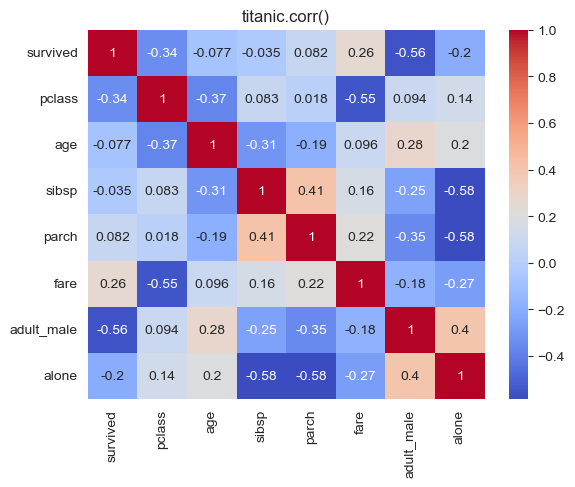

In [91]:
sns.heatmap(titanic.corr(numeric_only=True),cmap='coolwarm', annot=True)
plt.title('titanic.corr()');

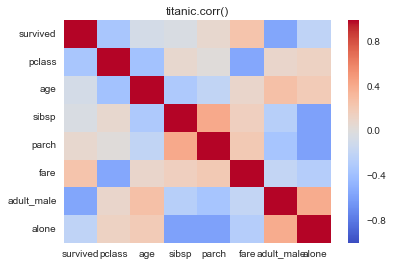

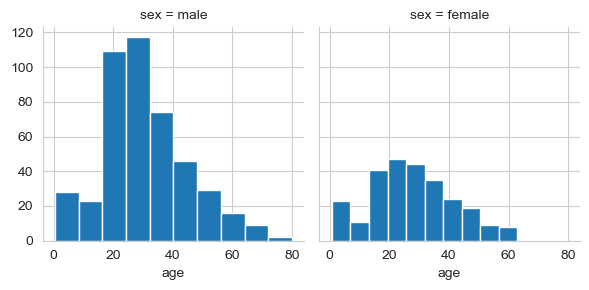

In [99]:
g = sns.FacetGrid(data=titanic,col='sex')
g.map(plt.hist,'age');

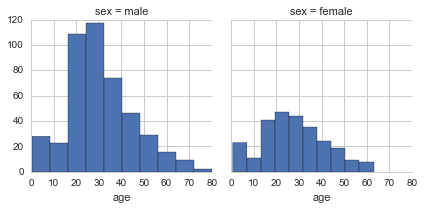

# Great Job!

### That is it for now! We'll see a lot more of seaborn practice problems in the machine learning section!